00  -   INICIO - Limpieza y Seteado inicial
        https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

        https://deepnote.com/@a_mas/Cross-Validation-en-Python-685fa851-b5b2-4c5b-b5fb-3dc5ae64838f

        https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html

        https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
        
        https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de distribución para cada variable numérica
import matplotlib.ticker as ticker
# ==============================================================================
# Identificador de tipos de Distribucion
# ==============================================================================
from fitter import Fitter, get_common_distributions
# ==============================================================================
url = "C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses.csv"

datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
#Limpiar datos
datos = datos.fillna(0)

# Se convierte la variable chimenea tipo string
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)
    
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])

01  -   Regresión Logística - Scikit-learn

01.01       Llamada de libreria
            En conclusión, la 
            Regresión Lineal:
                Es un algoritmo de regresión por lo que la utilizamos para predecir un valor numérico, mientras que la 
            Regresión Logística:
                Es un algoritmo de clasificación por lo que la utilizamos para predecir entre dos opciones.

In [2]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()


01.02       Seteado de datos

In [3]:
dic_replace = {'Yes': 1,
               'No': 0}
datos['aire_acondicionado'] = datos['aire_acondicionado'] \
                     .map(dic_replace) \
                     .fillna(datos['aire_acondicionado'])

dic_replace = {'none': 'septic'}
datos['desague'] = datos['desague'] \
                     .map(dic_replace) \
                     .fillna(datos['desague'])

datos_xx = datos.select_dtypes(include=['float64', 'int'])
datos_yy =datos[['desague']]

In [5]:
datos.desague.value_counts()

public/commercial    1213
septic                515
Name: desague, dtype: int64

In [27]:
datos_xx.info()
datos_yy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   banyos              1728 non-null   float64
 8   habitaciones        1728 non-null   int64  
 9   aire_acondicionado  1728 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 135.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   desague  1728 non-null   object
dtypes: object(1)
memory usage: 13.6

01.03       Reparto de data - test y train
            random_state    :
                simplemente fija una semilla para el generador de números aleatorios, lo que permite  reproducir la función. Es decir los registros seleccionados seran los mismos en cada ejecucion para el train y el test.
            shuffle         : 
                (que toma el valor True por defecto) especifica si los registros deberán ser desordenados previamente o no.

In [4]:
# Reparto de datos en train y test
# ==============================================================================
trainSize = 0.80
seed = 1234 # semilla(random_state)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_xx.drop('precio', axis = 'columns'),
                                        datos_yy,
                                        train_size   = trainSize,
                                        random_state = seed,
                                        shuffle      = True
                                    )

In [41]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 1571 to 815
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   metros_totales      1382 non-null   float64
 1   antiguedad          1382 non-null   int64  
 2   precio_terreno      1382 non-null   int64  
 3   metros_habitables   1382 non-null   int64  
 4   universitarios      1382 non-null   int64  
 5   dormitorios         1382 non-null   int64  
 6   banyos              1382 non-null   float64
 7   habitaciones        1382 non-null   int64  
 8   aire_acondicionado  1382 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 903 to 1425
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   metros_totales      346 non-null    float64
 1   antiguedad          346 non-null    int64 

In [ ]:
y_train.info()
y_test.info()

01.04       Entrenamiento del Modelo

In [5]:
modelLR.fit(X_train, y_train)

c:\Users\and14\Desktop\Proyectos\Programacion\Python\2022\Practica_20220831_ML\01_Excercises_Jupyter\02_Intermendio\envDS\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

01.05       Prediccion de los datos de testeo

In [6]:
targetPredic= modelLR.predict(X_test)

01.06       Muestra de resultados confusion_matrix

01.06.01       Accuracy_score

In [7]:
from sklearn.metrics import accuracy_score

predictions = modelLR.predict(X_test)
print(accuracy_score( predictions,y_test))

0.7052023121387283


01.06.02       Matris de Confusion

In [8]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(targetPredic, y_test)
df_cm = pd.DataFrame(array)

Text(0.5, 1.0, 'Distribución original')

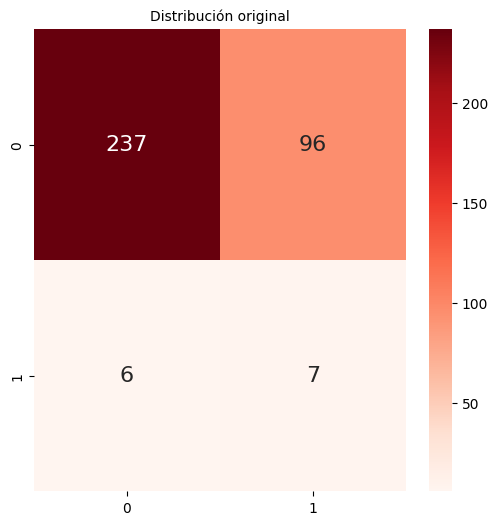

In [9]:

# sns.set(font_scale=1)
# plt.show(sns.heatmap(df_cm, annot = True, annot_kws={"size":16}, cmap='Reds'))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.heatmap(
    df_cm, 
    annot   = True, 
    annot_kws={"size":16}, 
    fmt       = '.0f',
    cmap    ='Reds'
)
axes.set_title("Distribución original", fontsize = 'medium')

# La matris es una forma visual de ver el acuraccy = 0.7052023121387283


01.06.03       classification_report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

public/commercial       0.71      0.98      0.82       243
           septic       0.54      0.07      0.12       103

         accuracy                           0.71       346
        macro avg       0.63      0.52      0.47       346
     weighted avg       0.66      0.71      0.61       346



01.07       La validación cruzada
            O cross validation, se define como una técnica muy utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre los datos de entrenamiento y prueba.
            Es muy útil para validar que el modelo de aprendizaje automático elegido es el correcto y ayuda a evitar el overfitting.

            Aplica el Modelo K veces con donde entrena el modelo con (k-1)/k% como train y compara con el 1/k restante como test, luego alterna con siguiente grupo k y asi con los k grupos formados.
            
            https://deepnote.com/@a_mas/Cross-Validation-en-Python-685fa851-b5b2-4c5b-b5fb-3dc5ae64838f
            https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

In [11]:
from sklearn import model_selection
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True) # trae el seed(semilla del punto 01.03)
cv_results = model_selection.cross_val_score(modelLR, datos_xx, datos_yy, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

c:\Users\and14\Desktop\Proyectos\Programacion\Python\2022\Practica_20220831_ML\01_Excercises_Jupyter\02_Intermendio\envDS\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\and14\Desktop\Proyectos\Programacion\Python\2022\Practica_20220831_ML\01_Excercises_Jupyter\02_Intermendio\envDS\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\and14\Desktop\Proyectos\Programacion\Python\2022\Practica_20220831_ML\01_Excercises_Jupyter\02_Intermendio\envDS\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [12]:
print(msg)
print(cv_results)
cv_results.mean()

Logistic Regression: 0.699617 (0.033707)
[0.73988439 0.67052023 0.71676301 0.75144509 0.67630058 0.73988439
 0.69942197 0.66473988 0.65116279 0.68604651]


0.6996168839897836

01.08       Prueba o Uso

In [35]:
datos_xx.head(10)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1.0,5,0
1,181115,0.92,0,22300,1953,51,3,2.5,6,0
2,109000,0.19,133,7300,1944,51,4,1.0,8,0
3,155000,0.41,13,18700,1944,51,3,1.5,5,0
4,86060,0.11,0,15000,840,51,2,1.0,3,1
5,120000,0.68,31,14000,1152,22,4,1.0,8,0
6,153000,0.40,33,23300,2752,51,4,1.5,8,0
7,170000,1.21,23,14600,1662,35,4,1.5,9,0
8,90000,0.83,36,22200,1632,51,3,1.5,8,0
9,122900,1.94,4,21200,1416,44,3,1.5,6,0


In [13]:

X_new = pd.DataFrame({	#'precio': [132500],	
						'metros_totales': [0.09],	
						'antiguedad': [42],	
						'precio_terreno': [50000],
						'metros_habitables': [906],	
						'universitarios': [35],	
						'dormitorios':	[2],
						'banyos': [1.0],
						'habitaciones': [5],
						'aire_acondicionado': [0]})
modelLR.predict(X_new)

array(['public/commercial'], dtype=object)

01.09       Guardar Modelo

In [14]:
import joblib
joblib.dump(modelLR,'C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses_Regresion_Logistica.joblib')

['C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses_Regresion_Logistica.joblib']

01.10       Uso del Modelo

In [19]:

modelo = joblib.load('C:/Users/and14/Desktop/Proyectos/Programacion/Python/2022/Practica_20220831_ML/00_Data_Sets/SaratogaHouses_Regresion_Logistica.joblib')

example01= pd.DataFrame({	#'precio': [132500],	
						'metros_totales': [0.09],	
						'antiguedad': [42],	
						'precio_terreno': [50000],
						'metros_habitables': [906],	
						'universitarios': [35],	
						'dormitorios':	[2],
						'banyos': [1.0],
						'habitaciones': [5],
						'aire_acondicionado': [0]})
predicciones =  modelo.predict(example01)
predicciones

array(['public/commercial'], dtype=object)